In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [143]:
# read csv files
df_west_raw = pd.read_csv('./drive/MyDrive/mids/w210/data/west_interval_data_01-29-2019_01-27-2021.csv')
df_east_raw = pd.read_csv('./drive/MyDrive/mids/w210/data/east_interval_data_01-29-2019_01-27-2021.csv')

In [144]:
df_west_raw.count()

Service Agreement    104736
Start Date Time      104736
End Date Time        104736
Usage                104724
Usage Unit           104724
Cost                      0
Currency Unit             0
Avg. Temperature     104716
Temperature Unit     104736
Event Flags               6
Peak Demand          104724
Demand Unit          104724
dtype: int64

In [147]:
def clean_data(data):
  df = data.copy(deep=True)

  # drop columns
  df = df.drop(columns=['Usage Unit', 'Currency Unit', 'Temperature Unit', 'Demand Unit'])

  # mapper for column rename
  rename_mapper = {'Service Agreement':'service',
                 'Start Date Time':'start',
                 'End Date Time':'end',
                 'Usage':'usage',
                 'Cost':'cost',
                 'Avg. Temperature':'temp',
                 'Event Flags':'event_flag',
                 'Peak Demand':'demand'}
  # rename columns
  df = df.rename(mapper=rename_mapper, axis='columns')

  # convert columns to datetime
  df.start, df.end = pd.to_datetime(df.start), pd.to_datetime(df.end)

  return df

In [148]:
df_west_clean = clean_data(df_west_raw)
df_west_clean.head()

,service,start,end,usage,cost,temp,event_flag,demand
0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8
1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6
2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0
3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0
4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8


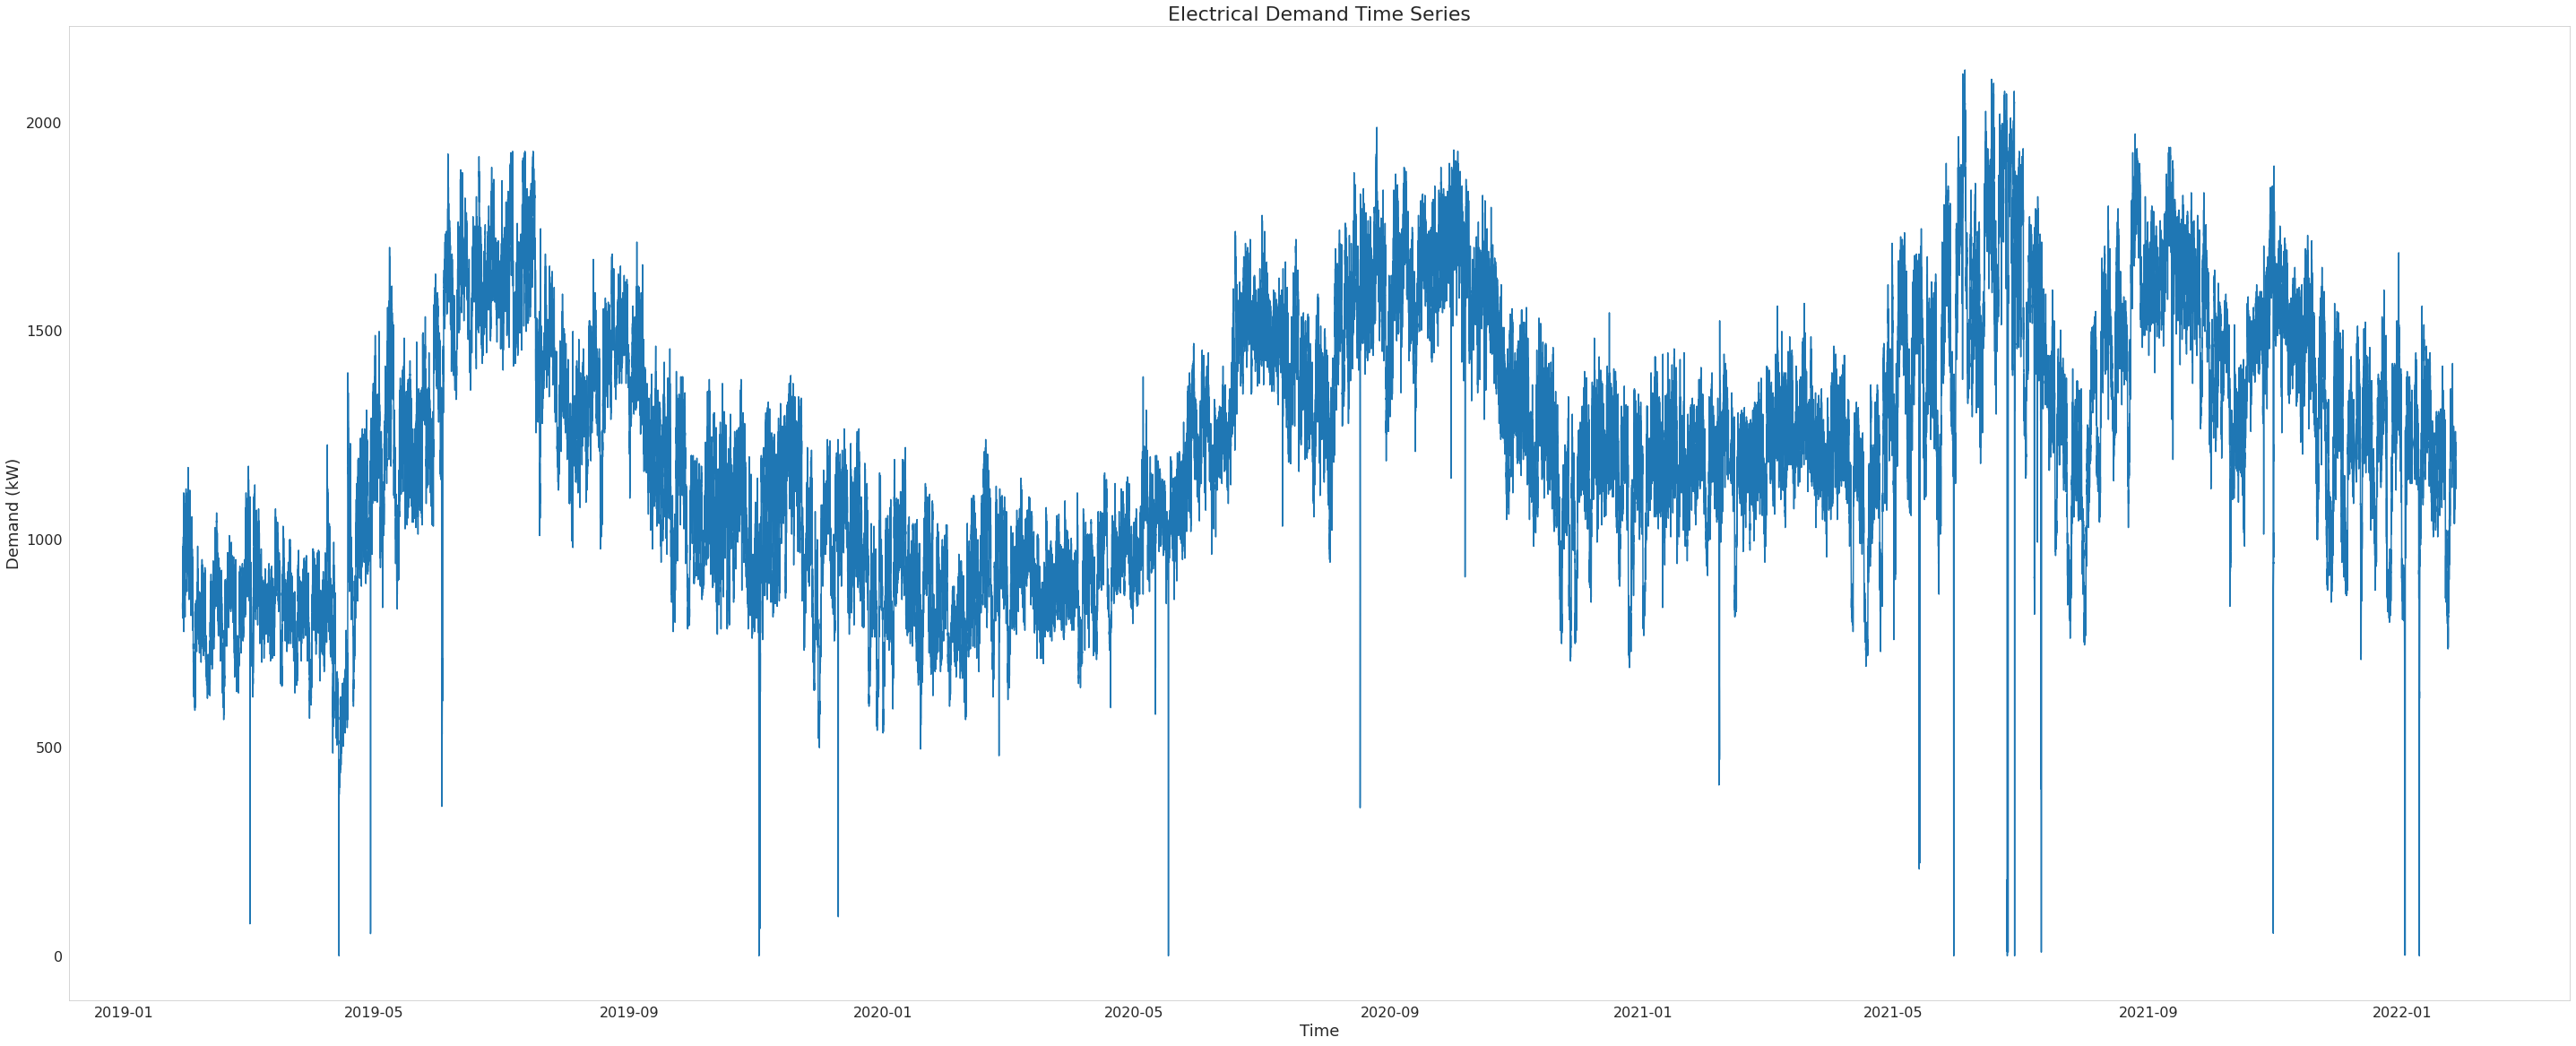

In [149]:
plt.rcParams['figure.figsize'] = (50, 20)
fig, ax = plt.subplots()

# add the time-series for "relative_temp" to the plot
ax.plot(df_west_clean.start, df_west_clean.demand)

# set title
ax.set_title("Electrical Demand Time Series", fontsize=22)

# set x-axis label
ax.set_xlabel("Time", fontsize=18)

# set y-axis label
ax.set_ylabel("Demand (kW)", fontsize=18)

# set xtick label
plt.xticks(fontsize=16)

# set ytick label
plt.yticks(fontsize=16)

ax.grid()

plt.show()

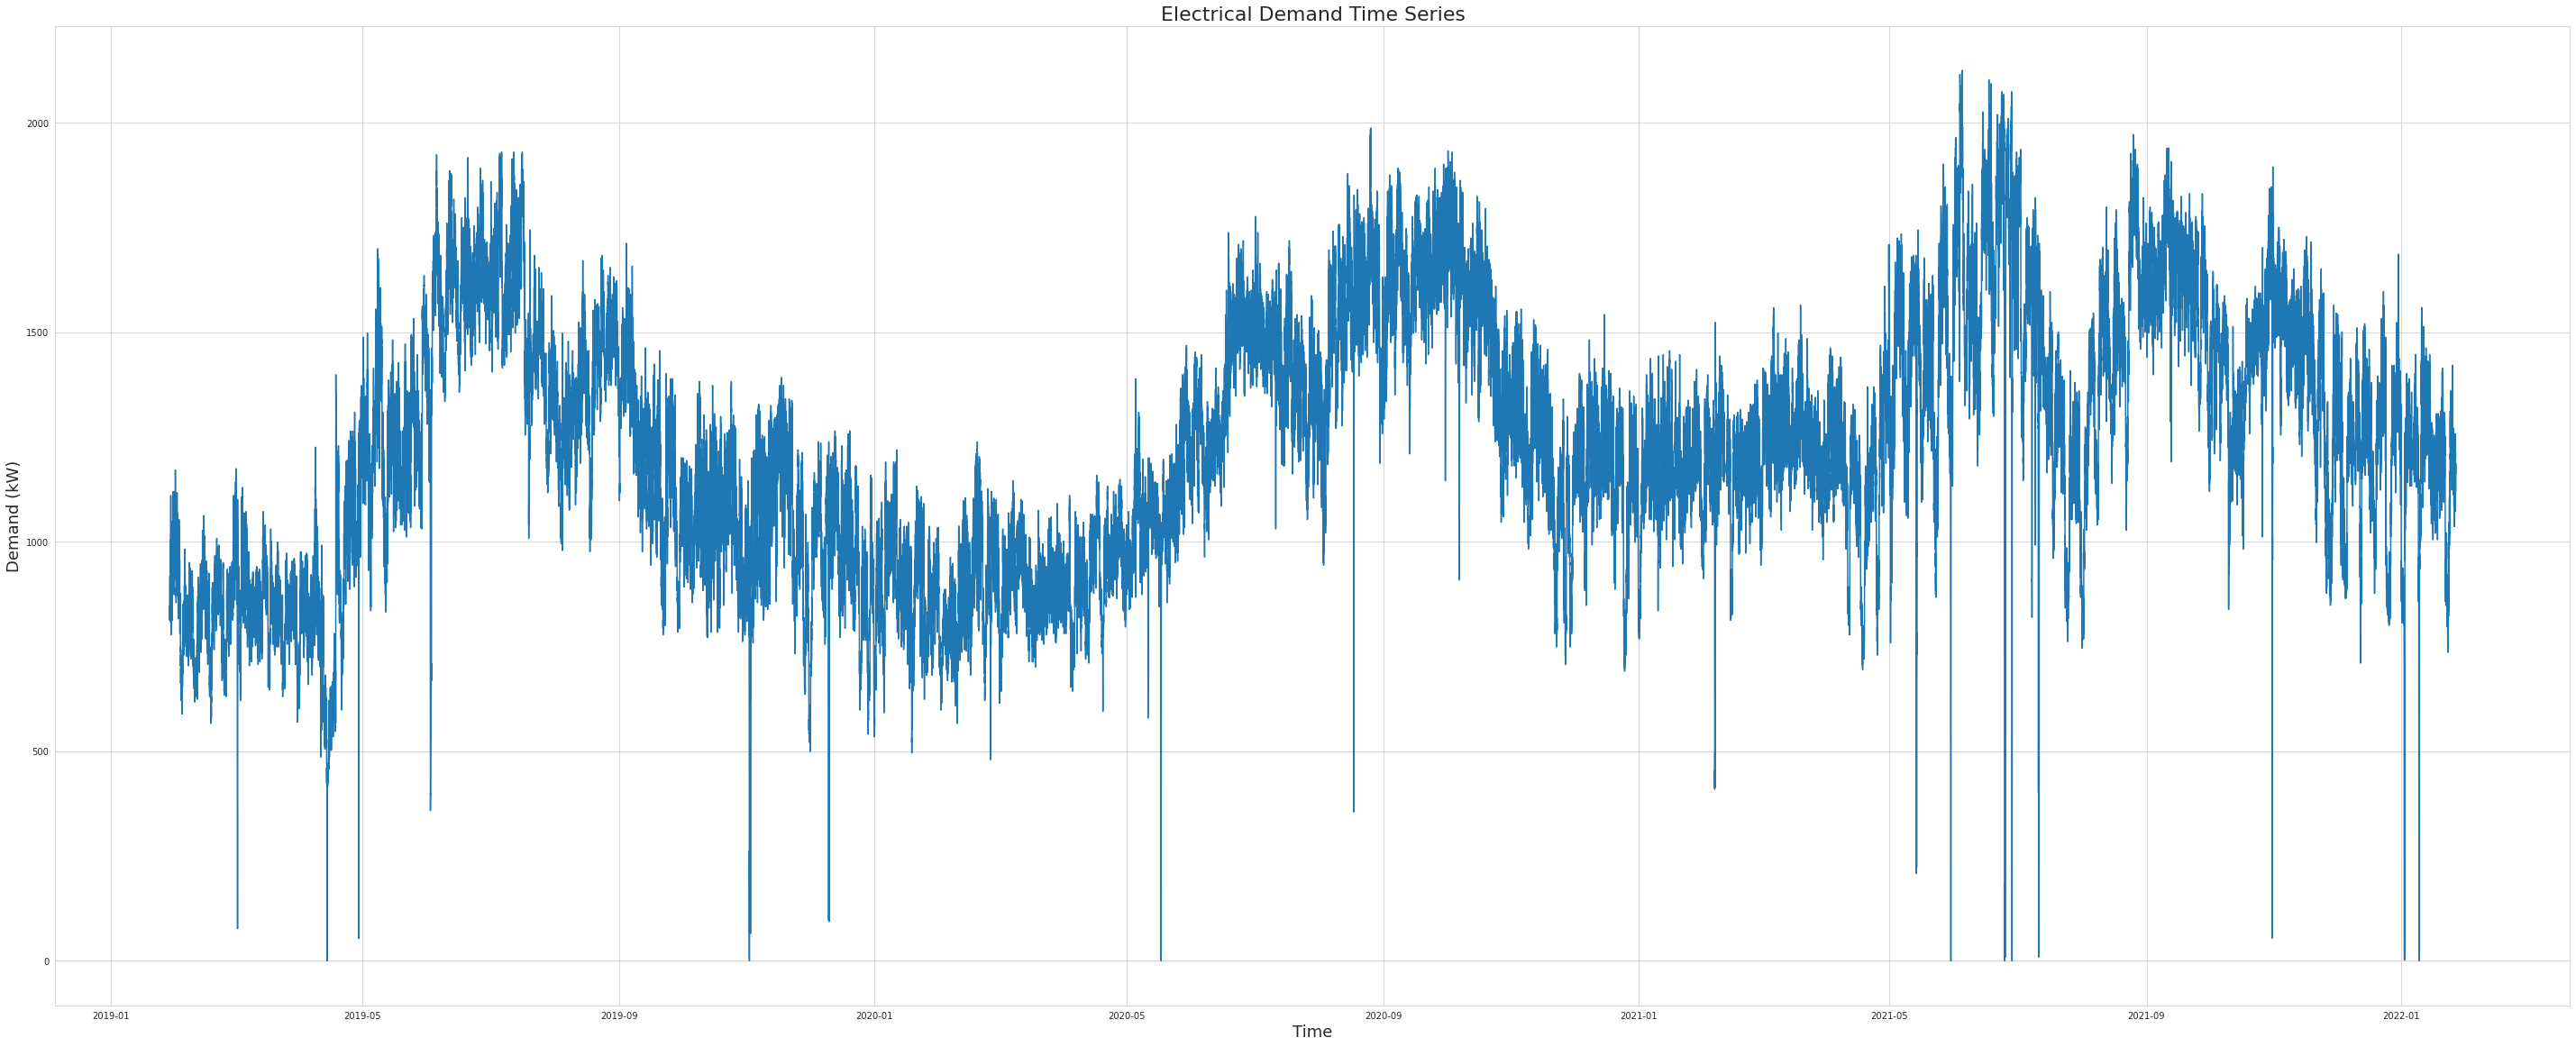

In [150]:
sns.set_style("whitegrid")
p = sns.lineplot(data=df_west_clean, x='start', y='demand')
p.set_title('Electrical Demand Time Series', fontsize=22)
p.set_xlabel('Time', fontsize=18)
p.set_ylabel('Demand (kW)', fontsize=18)
plt.show()

In [160]:
df_west_clean.head()

,service,start,end,usage,cost,temp,event_flag,demand
0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8
1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6
2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0
3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0
4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8


In [266]:
def feature_engineering(data):
  df = data.copy(deep=True)

  df['hour'] = df.start.dt.hour
  df['day'] = df.start.dt.dayofweek
  df['week'] = df.start.dt.isocalendar().week
  df['month'] = df.start.dt.month
  df['year'] = df.start.dt.year
  df['date'] = df.start.dt.date
  holidays = calendar().holidays(start=df.date.min(), end=df.date.max()).date
  df['holidays'] = df.date.isin(holidays)

  return df

In [267]:
df = feature_engineering(df_west_clean)
df.head()

,service,start,end,usage,cost,temp,event_flag,demand,hour,day,week,month,year,date,holidays
0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,0,1,5,1,2019,2019-01-29,False
1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,0,1,5,1,2019,2019-01-29,False
2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,0,1,5,1,2019,2019-01-29,False
3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,0,1,5,1,2019,2019-01-29,False
4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,1,1,5,1,2019,2019-01-29,False


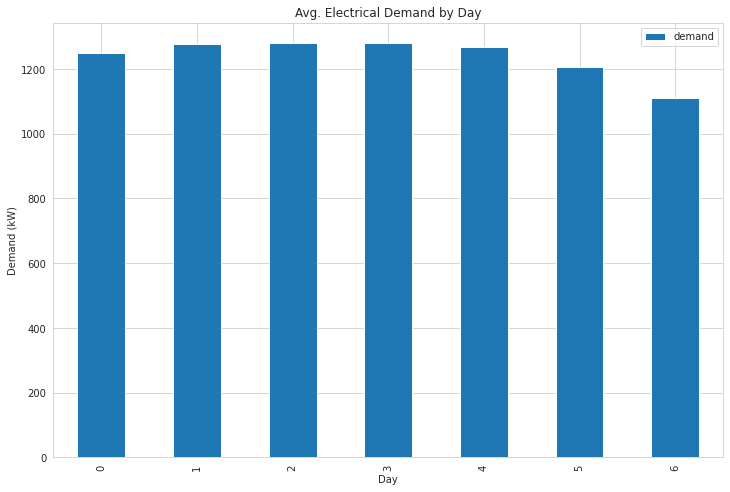

In [191]:
plt.rcParams['figure.figsize'] = (12, 8)
df[['day', 'demand']].groupby('day').mean().plot(kind='bar')
plt.title('Avg. Electrical Demand by Day')
plt.xlabel('Day')
plt.ylabel("Demand (kW)")
plt.show()

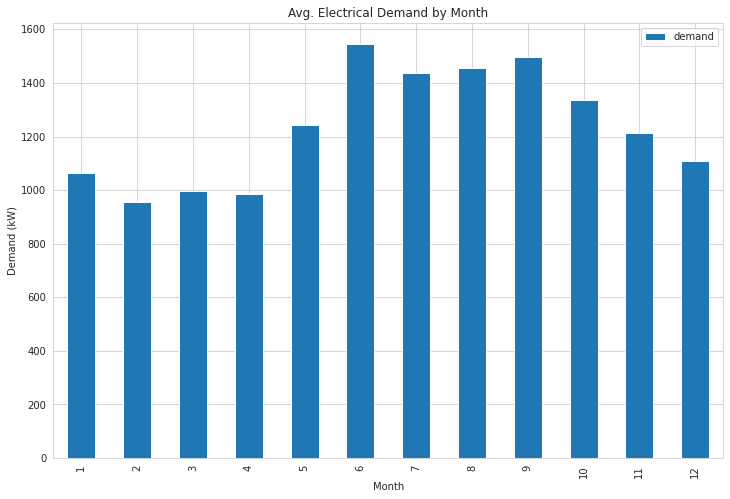

In [192]:
plt.rcParams['figure.figsize'] = (12, 8)
df[['month', 'demand']].groupby('month').mean().plot(kind='bar')
plt.title('Avg. Electrical Demand by Month')
plt.xlabel('Month')
plt.ylabel("Demand (kW)")
plt.show()

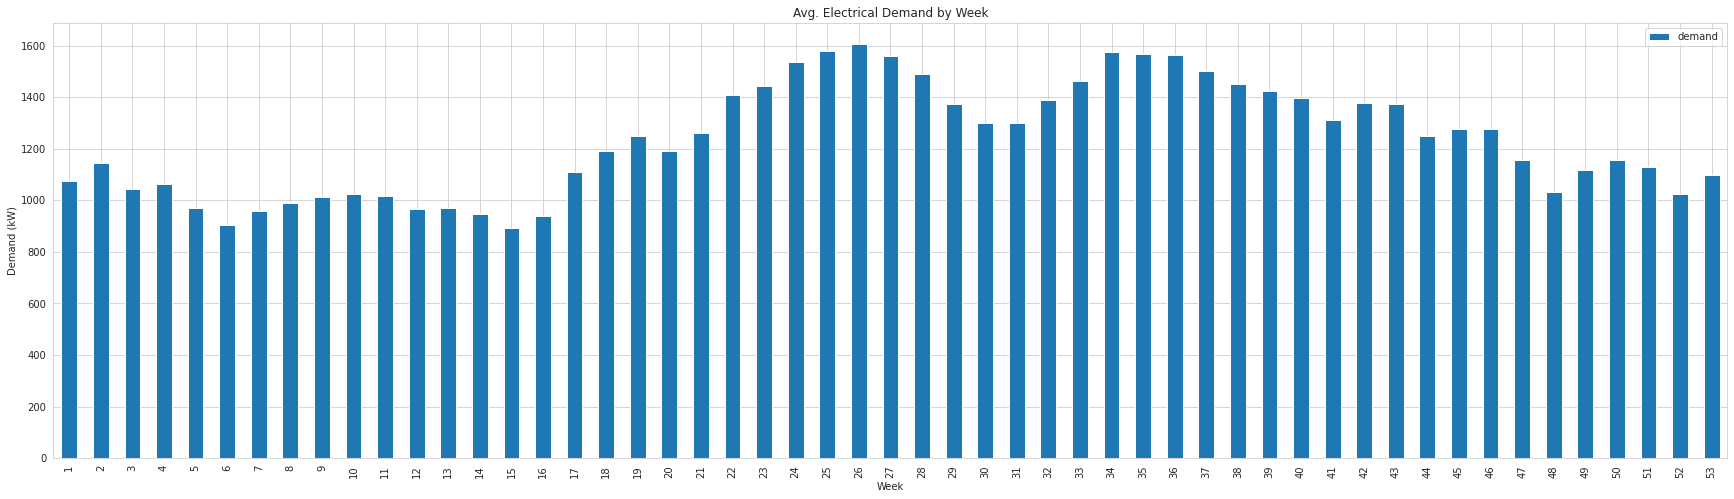

In [193]:
plt.rcParams['figure.figsize'] = (30, 8)
df[['week', 'demand']].groupby('week').mean().plot(kind='bar')
plt.title('Avg. Electrical Demand by Week')
plt.xlabel('Week')
plt.ylabel("Demand (kW)")
plt.show()

In [293]:
holidays[0].isocalendar()[1]

AttributeError: ignored

In [290]:
holidays[0]

datetime.date(2019, 2, 18)